In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# 데이터 분석.... 판다스...
import pandas as pd
df = pd.DataFrame(iris['data'],columns= iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] =  iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# EDA info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.describe()  # 기술통계량

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# 결측값 -- 주의  수치상 결측치가 없지만... 실제 의미상 존재 할수 있다.
# a001 ,a002  abcf
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [9]:
# 중복데이터 확인
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [11]:

df[(df.sepal_length == 5.8)&(df.sepal_width==2.7)&(df.petal_length==5.1)]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [12]:
# df.drop_duplicates()
df.drop(index=142,inplace=True)
df.iloc[140:150,:]

,sepal_length,sepal_width,petal_length,petal_width,target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


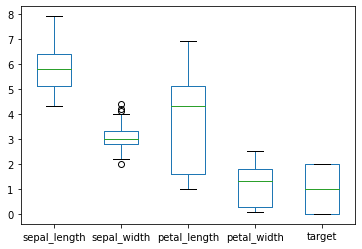

In [13]:
import matplotlib.pyplot as plt

temp = df.boxplot(grid=False)
plt.show()

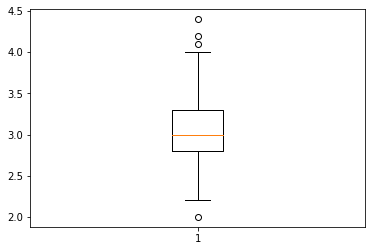

In [14]:
plt.boxplot( df.sepal_width)
plt.show()

In [15]:
# des = df.sepal_width.describe()
# print(des['75%'] - des['25%'])
# IRQ = des['75%'] - des['25%']
# df2 = df[(des['25%'] - IRQ <df.sepal_width) & (df.sepal_width< des['75%']+IRQ)]
# df2.head()

(149, 5)

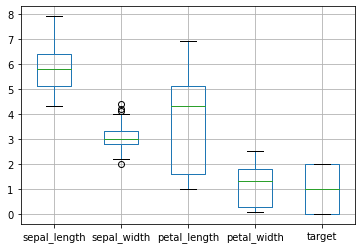

In [16]:
df2 = df;
df2.boxplot()
df2.shape

In [17]:
# 상관관계 분석
df2.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


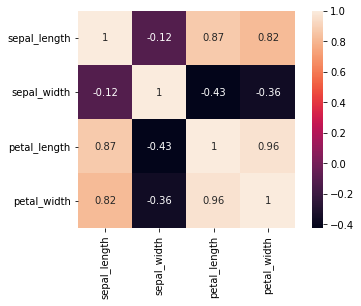

In [18]:
# 상관관계 시각화 sns
import seaborn as sns
sns.heatmap(data=df2.iloc[:,:-1].corr(),square=True, annot=True,cbar=True)
plt.show()

In [19]:
# 목표레이블의 클래스별 분포...  데이터 불균형 문제 발생 - 좀더 지켜보자..
df2['target'].value_counts()

0    50
1    50
2    49
Name: target, dtype: int64

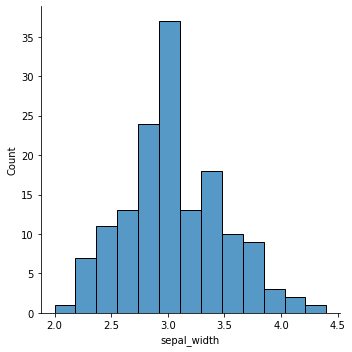

In [20]:
# 시본 displot함수  히스토그램
sns.displot(x='sepal_width', kind='hist', data = df2)
plt.show()

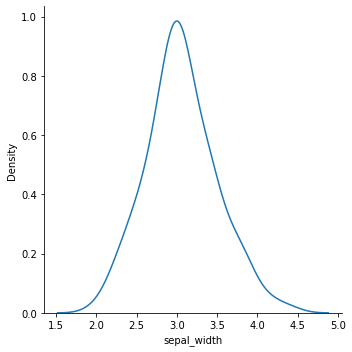

In [21]:
# 시본 displot함수  밀도
sns.displot(x='sepal_width', kind='kde', data = df2)
plt.show()

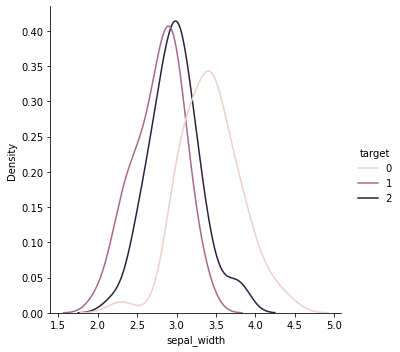

In [22]:
# 품종별로 데이터 분포  
sns.displot(x='sepal_width', hue='target' ,kind='kde', data = df2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


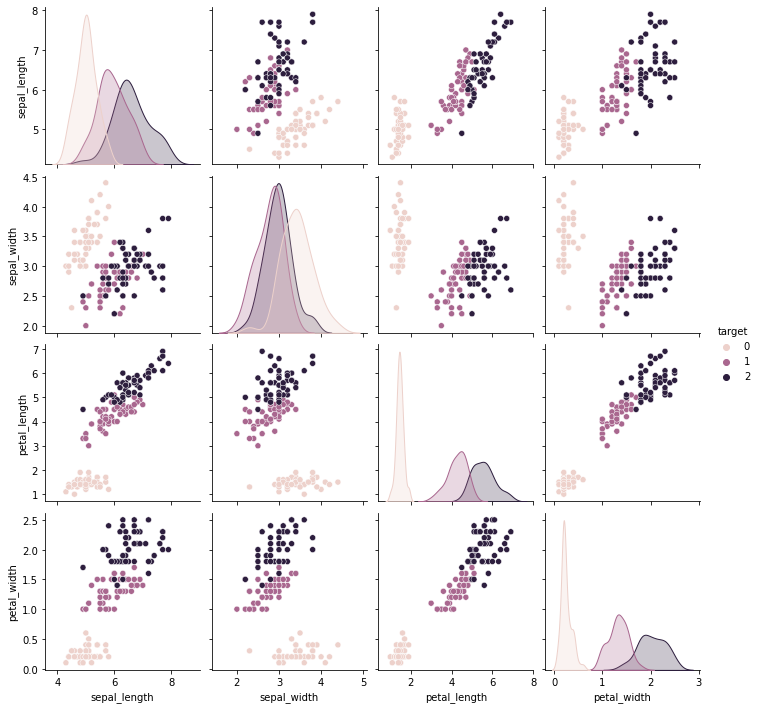

In [23]:
# 피처간 관계
sns.pairplot(df2,hue='target', diag_kind='kde',size=2.5)
plt.show()

In [24]:
# petal with & petal length
# classfication.... 
from sklearn.model_selection import  train_test_split
df2.columns
x_data = df2.loc[:,['petal_width','petal_length']]  #petal_length
y_data  = df2.loc[:,'target']
x_data.shape, y_data.shape

((149, 2), (149,))

In [25]:
x_train,x_test,y_train,y_test =  train_test_split(x_data,y_data,random_state=32,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((104, 2), (45, 2), (104,), (45,))

In [26]:
# 알고리즘.... 분류.... knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# 하이퍼파라메터튜닝 - 필요하면..
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [28]:
y_predic = knn.predict(x_test)
y_predic

array([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2,
       0])

In [29]:
# 성능 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_predic)
print("Accuracy : %.4f"% knn_acc)

Accuracy : 1.0000


In [30]:
# 분류알고리즘 SVM
# svm :  데이터 셋의 각 피처벡터들이 고유의 축을 갖는 벡터 공간
# 이때 각 군집까지의 거리(margin)를 최대한 멀리 유지하는 경계면을 찾는다 - 분류가 명확해 진다.
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [31]:
# 예측
y_svc_pred =  svc.predict(x_test)
print("예측값:",y_svc_pred[:5])
print("실제값:",y_test.values[:5])
#성능평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy:%.4f"%svc_acc)

예측값: [1 0 0 1 2]
실제값: [1 0 0 1 2]
Accuracy:0.9778


In [32]:
y_test.values[:5]

array([1, 0, 0, 1, 2])

In [33]:
# 로지스틱 회귀  - 회귀라는 이름을 가지지만 실제로는 분류
# 시그모이드 함수의 출력값(0~1사이) 각 분류 클래스에 속하게 될 확율값으로 사용
# 1에 가까우면 해당 클래스로 분류하고 0에 가까우면 아니라고 분류
# overfit이 발생하면...--- 규제알고리즘을 적용할수있다. L1, L2
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_lrc_pred =  lrc.predict(x_test)
print("예측값:",y_lrc_pred[:5])
# 성능평가
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("Accuracy:%.4f"%lrc_acc)

예측값: [1 0 0 1 2]
Accuracy:1.0000


In [35]:
# predict_proba : 각 클래스에 속할 확률 값을 예측
y_lrc_prob = lrc.predict_proba(x_test)
y_lrc_prob

array([[8.56088487e-03, 8.71354947e-01, 1.20084169e-01],
       [9.89877223e-01, 1.01227499e-02, 2.72133488e-08],
       [9.52660758e-01, 4.73384005e-02, 8.41416240e-07],
       [3.70480566e-03, 6.75562614e-01, 3.20732580e-01],
       [1.80594714e-04, 3.12765459e-01, 6.87053946e-01],
       [9.82452476e-07, 1.51723163e-02, 9.84826701e-01],
       [9.38335457e-01, 6.16627565e-02, 1.78605997e-06],
       [9.64616608e-01, 3.53830944e-02, 2.97496662e-07],
       [6.97767056e-03, 7.63345372e-01, 2.29676957e-01],
       [9.62937495e-01, 3.70619803e-02, 5.24427395e-07],
       [3.28006737e-03, 7.35932991e-01, 2.60786941e-01],
       [7.98371834e-05, 7.97787324e-02, 9.20141430e-01],
       [1.18937459e-01, 8.75413269e-01, 5.64927190e-03],
       [2.78170833e-02, 9.48144965e-01, 2.40379518e-02],
       [2.66695605e-04, 1.92051999e-01, 8.07681305e-01],
       [6.31113200e-04, 2.72659527e-01, 7.26709360e-01],
       [7.54325649e-03, 8.05609849e-01, 1.86846895e-01],
       [1.38505269e-03, 4.41718

In [36]:
# 의사결정 나무
# 트리 알고리즘을 사용
# 트리의 각 분기점(node)에는 데이터셋의 피처(설명 변수)를 하나씩 위치
# 트리의 최대 깊이는 max_depth 3으로 설정 , 트리의 깊이가  깊어지면 훈련데이터에 과적합이 일어난다

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
# 예측
y_dtc_pred =  dtc.predict(x_test)
print("예측값:",y_dtc_pred[:5])
#성능평가
dtc_acc = accuracy_score(y_test,y_dtc_pred)
print("Accuracy:%.4f"%dtc_acc)

예측값: [1 0 0 1 2]
Accuracy:0.9778


In [39]:
# 앙상블 모델
# 여러개의 모델이 예측한 값을 결합하여 최종 예측값을 결정하는 방법
# 보팅(3개의 모델을사용) : 같은데이터를 사용해서 학습 옵션중에 hard를 설정하면 3개모델이 예측한 값 중에서 다수결로
# 분류를정한다  

# 배깅
# 서로다른 데이터를 샘플링하여 학습

In [40]:
# 보팅
from sklearn.ensemble import VotingClassifier
# voting 다수결은 hard    평균 soft

In [41]:
hvc = VotingClassifier(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)], voting='hard')

In [42]:
hvc.fit(x_train,y_train)
y_hvc_pred = hvc.predict(x_test)
print("예측값:",y_hvc_pred[:5])
#성능평가
hvc_acc = accuracy_score(y_test,y_hvc_pred)
print("Accuracy:%.4f"%dtc_acc)

예측값: [1 0 0 1 2]
Accuracy:0.9778


In [43]:
# 배깅 알고리즘을 이용한 - RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=20)
rfc.fit(x_train,y_train)
y_rfc_pred = rfc.predict(x_test)
print("예측값:",y_rfc_pred[:5])
#성능평가
rfc_acc = accuracy_score(y_test,y_hvc_pred)
print("Accuracy:%.4f"%rfc_acc)

예측값: [1 0 0 1 2]
Accuracy:0.9778


In [44]:
# 앙상블 모델
# 부스팅 - XGBoost
# 여러개의 약한 학습기(가벼운 모델)를 순차적으로 학습한다.
# 잘못 예측한 데이터에 대한 예측 오차를 줄일수 있는 방향으로 모델을 계속 업데이트 
# 여러모델을 동시에 학습하지 않고 순서대로 학습하는점에서 배깅과 다르다...

In [45]:
# XGBoost : 속도가 빠르고 예측력이 상당히 좋은 편
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50,max_depth=3,random_state=20)
xgbc.fit(x_train,y_train)
y_xgbc_pred =  xgbc.predict(x_test)
print("예측값:",y_xgbc_pred[:5])
#성능평가
xgbc_acc = accuracy_score(y_test,y_xgbc_pred)
print("Accuracy:%.4f"%xgbc_acc)

예측값: [1 0 0 1 1]
Accuracy:0.9778


In [46]:
# 교차검증
# 학습데이터 일부를 검증데이터로 사용하는 방법을 hold-out 교차검증
# 검증데이터는 모델 학습에 사용되지 않은 데이터.. 모델의 일반화 성능을 평가하는데 사용
#  결국은 테스트 데이터에 대한 예측력을 높여준다.
# 위에서나눈  x_train을 7:3으로 분활

In [47]:
x_tr,x_val,y_tr,y_val =  train_test_split(x_train,y_train,test_size=0.3,random_state=20)

In [48]:
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape

((72, 2), (32, 2), (72,), (32,))

In [49]:
# 랜덤포레스트에 적용
rfc = RandomForestClassifier(max_depth=3,random_state=20)
rfc.fit(x_tr, y_tr)
#예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)
#검증
tr_acc = accuracy_score(y_tr,y_tr_pred)
val_acc = accuracy_score(y_val,y_val_pred)
tr_acc, val_acc

(0.9444444444444444, 0.9375)

In [50]:
#예측
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test,y_test_pred)
test_acc

1.0

In [51]:
# 교차검증 k-fold
# k-fold는 hold-out을 여러번 반복하는 방법
# 랜덤포레스트를 k-fold 교차 검증으로 평가

In [52]:
from sklearn.model_selection import KFold

In [60]:
kfold = KFold()
count = 1
result = []
for tr_index, val_idx in kfold.split(x_train, y_train):  
  # 훈련용 데이터와 검증용데이터를 행 인덱스 기준으로 추출
  x_tr,x_val = x_train.iloc[tr_index,:], x_train.iloc[val_idx,:]
  y_tr,y_val = y_train.iloc[tr_index], y_train.iloc[val_idx]
  # #학습
  rfc=RandomForestClassifier(max_depth=5,random_state=20)
  rfc.fit(x_tr,y_tr)
  #검증
  y_val_predic = rfc.predict(x_val)
  val_acc = accuracy_score(y_val,y_val_predic)
  result.append(val_acc)
  print(f"{count} Fold Accuracy:{val_acc}")
  count += 1

1 Fold Accuracy:0.8571428571428571
2 Fold Accuracy:0.9523809523809523
3 Fold Accuracy:1.0
4 Fold Accuracy:0.9523809523809523
5 Fold Accuracy:0.9


In [61]:
# 위의 5개의 검증 정확도의 평균
import numpy as np
mean_score = np.mean(result)
mean_score

0.9323809523809524

In [63]:
# Regression...
from sklearn import datasets
housing = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [64]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [71]:
data = pd.DataFrame(housing['data'],columns= housing['feature_names'])
target = pd.DataFrame(housing['target'],columns= ['Target'])
df.shape, target.shape

((506, 13), (506, 1))

In [72]:
df = pd.concat([data,target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
# 데이터 탐색
# 기술통계
# 결측값
# 이상치

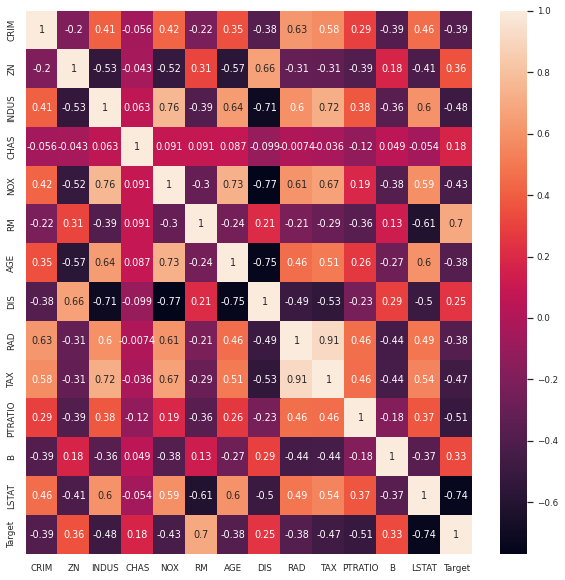

In [79]:
# 상관관계
df.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(),annot=True)#,cbar=False)
plt.show()

In [80]:
# 목표변수 Target열과 상관계수가 높은 순서대로 열 이름과 상관계수를 출력
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [87]:
# 상관관계가 높은 순서대로 열 이름과 상관 계수를 출력
df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [96]:
# Target 변수와 함께 상관 계수가 높은 순서대로 4개 피처를 추출
plot_cols = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False).index[:4]
plot_df= df.loc[:,plot_cols]
plot_df = pd.concat([df['Target'],plot_df],axis=1)
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


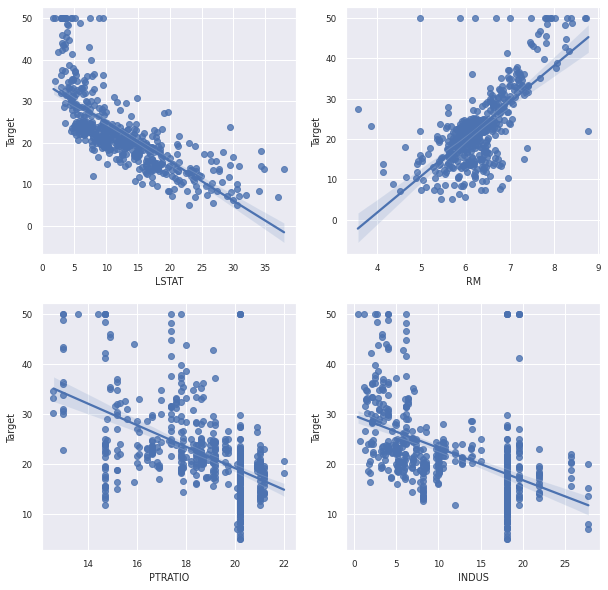

In [99]:
# seaborn 함수의 regplot 함수로 선형회귀 선을 산점도에 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_df.columns[1:]):
  ax1 = plt.subplot(2,2,idx+1)
  sns.regplot(x=col, y=plot_df.columns[0],data=plot_df, ax= ax1)
plt.show()  

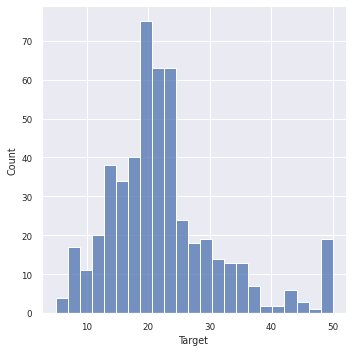

In [100]:
# target에 대해서 좀더 확인이 필요.. 분포를 시각화
# target 데이터 분포
sns.displot(x='Target',kind='hist',data=df)
plt.show()

In [ ]:
# 데이터 전처리..
# -- 피처 스케일링..